# CTA200H Assignment 2 - Anatoly Zavyalov

## Question 1

Here, we define two functions `deriv_1` and `deriv_2` that approximate the derivative of the function $f$ using the two methods of approximation.

In [21]:
def deriv_1(f: any, x0: float, h: float) -> float:
    """
    Return an approximation of the derivative of function f at x0, with stepsize h, 
    using the first method of approximation.
    
    Preconditions:
    - f is a Python function that accepts x0 as input and returns a float
    - 0 < h < 1
    """
    
    return (f(x0 + h) - f(x0)) / h

def deriv_2(f: any, x0: float, h: float) -> float:
    """
    Return an approximation of the derivative of function f at x0, with stepsize h, 
    using the second method of approximation.
    
    Preconditions:
    - f is a Python function that accepts x0 as input and returns a float
    - 0 < h < 1
    """
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

We see that the functions accurately approximate the derivative with small values of $h$:

In [3]:
import numpy as np

print("Approximation 1:", deriv_1(np.sin, 0.1, 0.0001))
print("Approximation 2:", deriv_2(np.sin, 0.1, 0.0001))
print("Analytical:     ", np.cos(0.1))

Approximation 1: 0.9949991719489237
Approximation 2: 0.9950041636197504
Analytical:      0.9950041652780258


We then find the error of the functions by trying different values of $h$, and plot them using `matplotlib`:

<IPython.core.display.Javascript object>


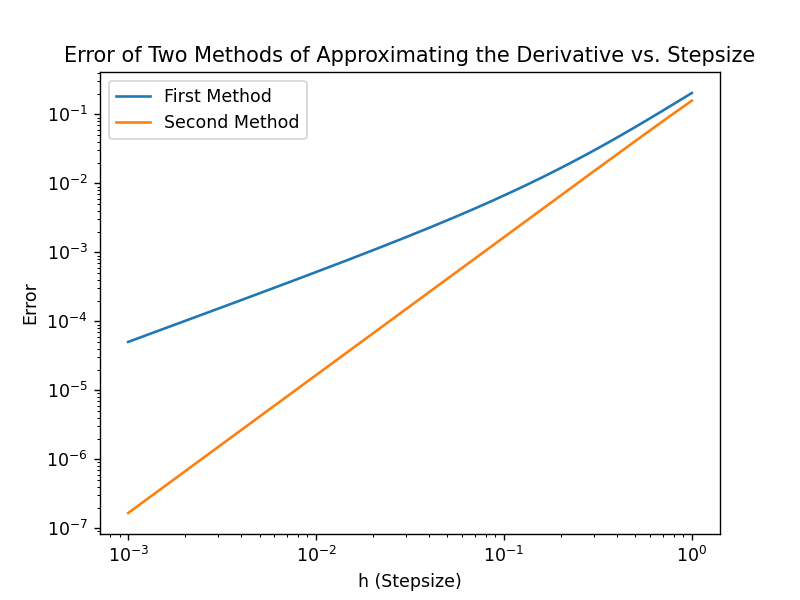

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

def find_error(f: any, d: any, x0: float, h: float, type: int) -> float:
    """
    Find the error of f's derivative approximation to the actual derivative, d, given x0 and h.
    
    If type is 1, use deriv_1. Otherwise, use deriv_2.
    
    Preconditions:
     - f is a differentiable function, where d is the derivative of f
     - x0 is in the domain of f and d
     - 0 < h < 1
     - type in {1, 2}
    """
    
    # Find the derivative approximation of f at x0 with stepsize h
    if type == 1:
        numerical = deriv_1(f, x0, h)
    else: 
        # Preconditions assume that type is 2 if not 1
        # assert type == 2
        numerical = deriv_2(f, x0, h)
    
    # Find actual derivative of f at x0
    analytic = d(x0)
    
    # Return error
    return abs(numerical - analytic) / analytic


# The value at which the functions will be evaluated
x0 = 0.1

# Step for the value of h (start at step, increment by step, end at 1-step)
step = 0.001

# Range of the h values to test
r = np.arange(step, 1, step)

# ACCUMULATOR: Values of find_error at each step so far, using both types
vals_so_far_1 = []
vals_so_far_2 = []

f = np.sin
d = np.cos


# Test different values of stepsize h
for h in r:
    vals_so_far_1.append(find_error(f, d, x0, h, 1))
    vals_so_far_2.append(find_error(f, d, x0, h, 2))
    

plt.title("Error of Two Methods of Approximating the Derivative vs. Stepsize")
plt.xlabel("h (Stepsize)")
plt.ylabel("Error")
plt.loglog(r, vals_so_far_1, label="First Method")
plt.loglog(r, vals_so_far_2, label="Second Method")
plt.legend()
plt.show()

#### Observations
We see that the absolute error of the two methods of approximations have the same approximate innacuracy when the stepsize is high, but the second method of approximation is more accurate by orders of magnitude when the stepsize is decreased.

The slope of the error vs. stepsize plot represents how rapidly the method becomes more innacurate as the stepsize is increased.

---

## Question 2

We first test the process:

<IPython.core.display.Javascript object>


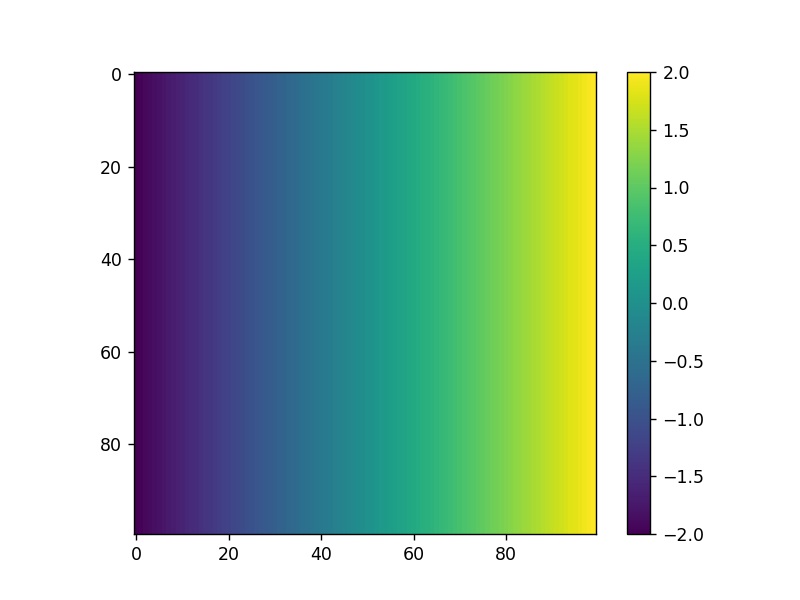

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

N = 100

x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y)

plt.imshow(xv)
plt.colorbar()

The following is just a two-colored Mandelbrot set:

<IPython.core.display.Javascript object>


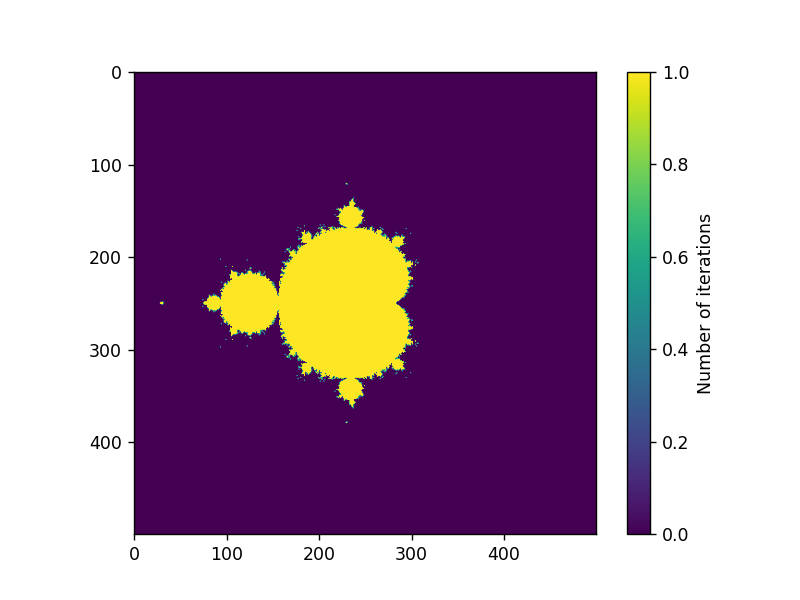

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Threshold for determining if the sequence diverges.
threshold = 4

# Maximum number of times to iterate
max_iteration = 50

N = 500

x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y)

def check_bounded(x, y) -> float:
    """
    Return 1 if x + yi is bounded after applying z(i+1) = z(i)^2 + (x+yi) a bunch of times, otherwise return 0.
    
    It is bounded if after <max_iteration> iterations, the absolute value of z(n) is less than threshold.
    """
    c = complex(x, y)
        
    curr_z = 0

    bounded = True

    for _ in range(max_iteration):
        next_z = curr_z**2 + c


        if abs(next_z) > threshold:
            bounded = False
            break

        curr_z = next_z

    if bounded:
        return 1.0
    else:
        return 0.0

bounded_vec = np.vectorize(check_bounded)

vals = bounded_vec(xv, yv)
    
plt.imshow(vals)
cbar = plt.colorbar()
cbar.set_label("Number of iterations")
plt.show()

Here is the Mandelbrot set but with different colors based on the number of iterations it requires for the value to become unbounded:

<IPython.core.display.Javascript object>


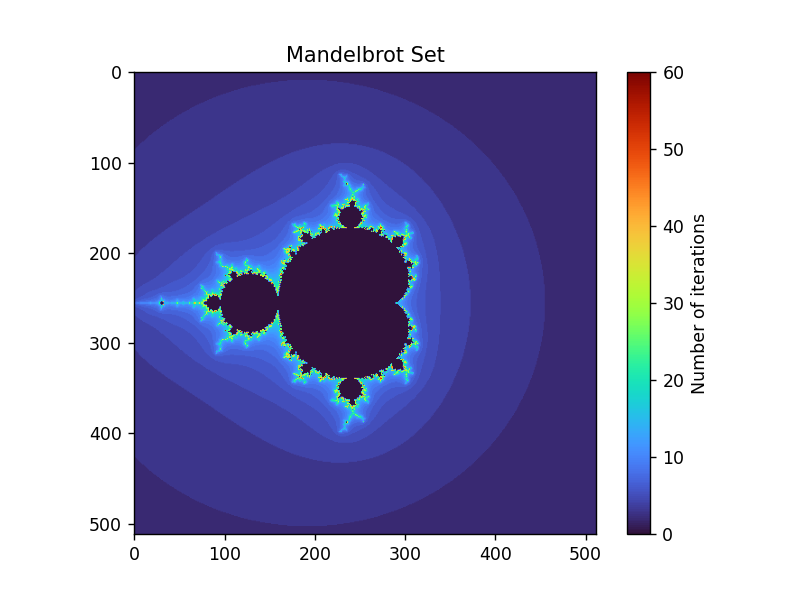

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Threshold for determining if the sequence diverges.
threshold = 4

# Maximum number of times to iterate
max_iteration = 60

N = 512

x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y)

def check_bounded(x, y) -> int:
    """
    Return number of iterations (bounded by <max_iteration>) before z(i+1) = z(i)^2 + (x+yi) exceeds <threshold>.
    """
    c = complex(x, y)
        
    curr_z = 0

    bounded = True
    
    iterations = 0

    for i in range(max_iteration):
        next_z = (curr_z)**2 + c


        if abs(next_z) > threshold:
            bounded = False
            iterations = i + 1
            break

        curr_z = next_z

    return iterations

bounded_vec = np.vectorize(check_bounded)

vals = bounded_vec(xv, yv)
    
plt.title("Mandelbrot Set")
plt.imshow(vals, cmap="turbo")
cbar = plt.colorbar()
cbar.set_label("Number of iterations")
plt.show()

Very nice, right?

---

## Question 3

For this experiment, the values of $\beta$ and $\gamma$ represent the infection and recovery coefficients, respectively. 

The infection rate $\displaystyle\frac{dI}{dt}$ is dependent on the fraction of the population that is infected, the size of the susceptible population and the infection coefficient $\beta$ (as well as the recovery rate). This infection coefficient dictates how likely it is for a susceptible individual to contract the disease from an infected individual. Hence, we want $0 \leq \beta \leq 1$.

Similarly, for the recovery rate $\displaystyle \frac{dR}{dt}$, it is dependent on the size of the infected population and the recovery coefficient $\gamma$. The recovery coefficient represents how likely it is for an infected individual to recover from it at a particular time. Hence, we also want $0 \leq \gamma \leq 1$. 

For all four pairs of $(\beta, \gamma)$, we choose some variation of values that seem plausible: for example, for the third run, we choose $\beta = 0.05$ and $\gamma = 0.1$, which represents that 1/20 of susceptible people get infected when coming into contact with an infected person, and 1/10 of infected people recover after one unit of time.

<IPython.core.display.Javascript object>


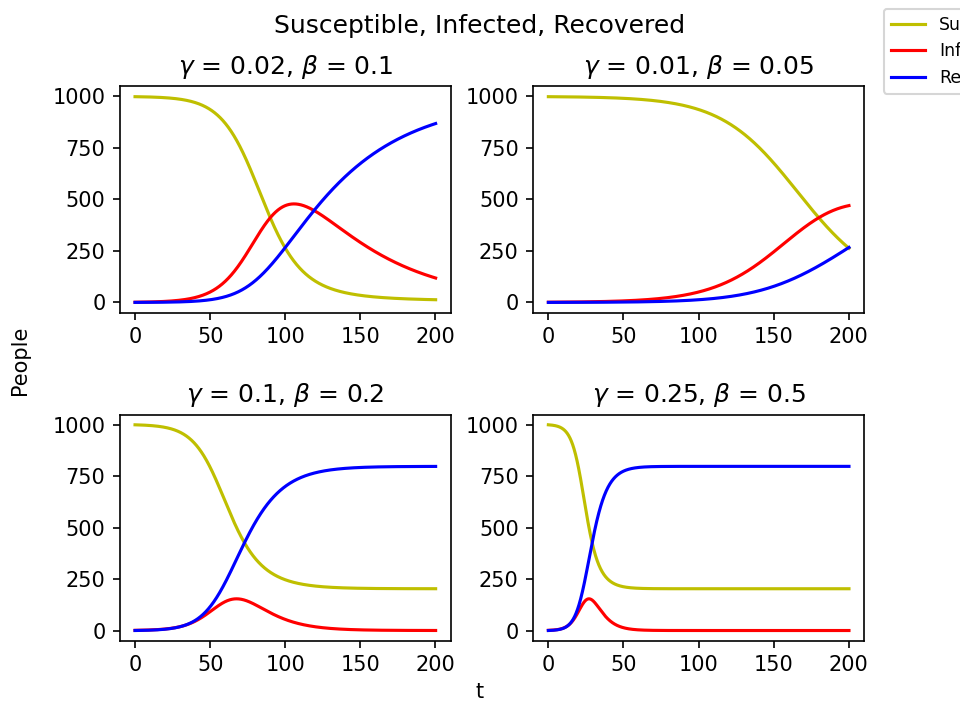

In [7]:
from scipy.integrate import ode
from typing import List
import matplotlib.pyplot as plt
import numpy as np

def get_SIR(t: float, y: List[float], beta: float, gamma: float) -> List[float]:
    """
    Function that returns the RHS of the ODEs for S, I, R.
    
    Parameters:
     - t: Time
     - y: Array of [S, I, R]
     - beta: infection coefficient
     - gamma: recovery coefficient
     
    Preconditions:
     - t >= 0
    """
    
    # Extract the values of S, I, R
    S, I, R = y
    
    # Find the value of N
    N = S + I + R
    
    return [-beta * S * I / N, beta * S * I / N - gamma * I, gamma * I]

# Set initial conditions
S0 = 999
I0 = 1
R0 = 0
y0 = [S0, I0, R0]

# An array of (beta, gamma) pairs to try
params = [(0.1, 0.02), (0.2, 0.1), (0.05, 0.01), (0.5, 0.25)]

t0 = 0.0

# End time and timestep
t_end = 200
dt = 0.1

index = 0

fig, axs = plt.subplots(2, 2)

for (beta, gamma) in params:
    
    # Arrays to store results
    times = [t0]
    results = [y0]

    # Set up the solver
    solver = ode(get_SIR)
    solver.set_integrator('dopri5')
    solver.set_initial_value(y0, t0)
    solver.set_f_params(beta, gamma)

    # Solve the equation
    while solver.successful() and solver.t < t_end:

        # Append the time to 
        times.append(solver.t + dt)
        results.append(solver.integrate(solver.t + dt))

    S, I, R = np.array(results).T
    times_np = np.array(times)

    # Plot results for each variable
    axs[index%2][index//2].set_title(f"$\gamma$ = {gamma}, $\\beta$ = {beta}")
    axs[index%2][index//2].plot(times_np, S, 'y', label='Susceptible' if index == 0 else '')
    axs[index%2][index//2].plot(times_np, I, 'r', label='Infected' if index == 0 else '')
    axs[index%2][index//2].plot(times_np, R, 'b', label='Recovered' if index == 0 else '')
    
    index += 1

# Set up plot stuff and show the figure
plt.subplots_adjust(hspace=0.45, wspace=0.25)
fig.dpi = 120
fig.suptitle("Susceptible, Infected, Recovered")
fig.legend(fontsize="small", bbox_to_anchor=(1.1, 1))

fig.text(0.5, 0.03, 't', ha='center')
fig.text(0.01, 0.5, 'People', va='center', rotation='vertical')

fig.show()

Now, we add a death parameter and a death coefficient $\kappa$, which represents how much of the infected population dies every unit of time due to the disease. Since a nonnegative amount of the infected population must die at every timestep (people cannot be revived from the dead, unfortunately), $\kappa$ must be nonnegative, and, since the death rate is bounded by the number of infected people, $\kappa < 1$. Hence $0 < \kappa < 1$.

The first order differential equations now become:

$$
\frac{dS}{dt} = - \frac{\beta S I}{N}, \tag{1}
$$

$$
\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I - \kappa I, \tag{2}
$$

$$
\frac{dR}{dt} = \gamma I, \tag{3}
$$

$$
\frac{dD}{dt} = \kappa I \tag{4}
$$

We see that $\displaystyle\frac{dS}{dt}$ and $\displaystyle\frac{dR}{dt}$ are unaffected by the fact that immortality is no more, as susceptible people cannot die from the disease if they do not have it, and neither can recovered people. However, $\displaystyle\frac{dI}{dt}$ is affected, as the change of the size of the infected population is decreased by $\displaystyle\frac{dD}{dt}$, which is the change of the size of the dead population.

<IPython.core.display.Javascript object>


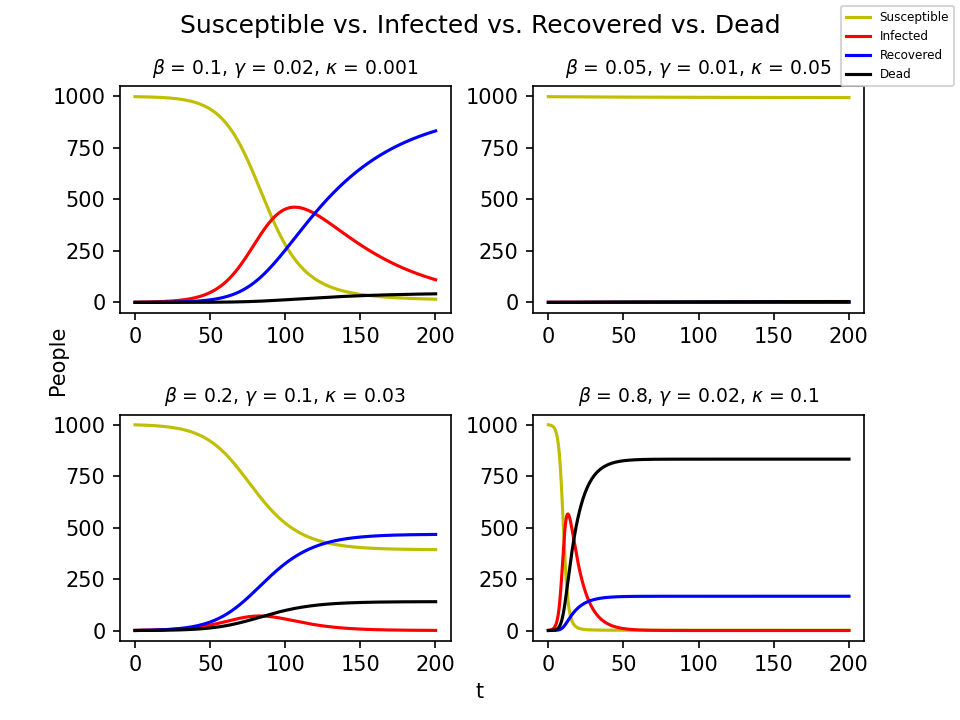

In [29]:
from scipy.integrate import ode
from typing import List
import matplotlib.pyplot as plt
import numpy as np

def get_SIRD(t: float, y: List[float], beta: float, gamma: float, kappa: float) -> List[float]:
    """
    Function that returns the RHS of the ODEs for S, I, R, D.
    
    Parameters:
     - t: Time
     - y: Array of [S, I, R, D]
     - beta: infection coefficient
     - gamma: recovery coefficient
     - kappa: death coefficient
     
    Preconditions:
     - t >= 0
    """
    
    # Extract the values of S, I, R
    S, I, R, D = y
    
    # Find the value of N
    N = S + I + R + D
    
    return [-beta * S * I / N, beta * S * I / N - gamma * I - kappa * I, gamma * I, kappa * I]

# Set initial conditions
S0 = 999
I0 = 1
R0 = 0
D0 = 0
y0 = [S0, I0, R0, D0]

# An array of (beta, gamma, kappa) pairs to try
params = [(0.1, 0.02, 0.001), (0.2, 0.1, 0.03), (0.05, 0.01, 0.05), (0.8, 0.02, 0.1)]

# Initial time is 0
t0 = 0.0

# End time and timestep
t_end = 200
dt = 0.1

index = 0

fig, axs = plt.subplots(2, 2)

for (beta, gamma, kappa) in params:
    
    # Arrays to store results
    times = [t0]
    results = [y0]

    # Set up the solver
    solver = ode(get_SIRD)
    solver.set_integrator('dopri5')
    solver.set_initial_value(y0, t0)
    solver.set_f_params(beta, gamma, kappa)

    # Solve the equation
    while solver.successful() and solver.t < t_end:

        # Append the time to 
        times.append(solver.t + dt)
        results.append(solver.integrate(solver.t + dt))

    S, I, R, D = np.array(results).T
    times_np = np.array(times)

    # Plot results for each variable.
    # Note that matplotlib is really dumb so unless I only add the labels for the first index, it will
    # repeat the same labels in the legend.
    axs[index%2][index//2].set_title(f"$\\beta$ = {beta}, $\gamma$ = {gamma}, $\kappa$ = {kappa}", fontsize=9)
    axs[index%2][index//2].plot(times_np, S, 'y', label='Susceptible' if index == 0 else '')
    axs[index%2][index//2].plot(times_np, I, 'r', label='Infected' if index == 0 else '')
    axs[index%2][index//2].plot(times_np, R, 'b', label='Recovered' if index == 0 else '')
    axs[index%2][index//2].plot(times_np, D, 'k', label='Dead' if index == 0 else '')
    
    index += 1

# Set up plot stuff and show the figure
plt.subplots_adjust(hspace=0.45, wspace=0.25)
fig.dpi = 120
fig.suptitle("Susceptible vs. Infected vs. Recovered vs. Dead")
fig.legend(fontsize="xx-small", bbox_to_anchor=(1., 1))

fig.text(0.5, 0.03, 't', ha='center')
fig.text(0.05, 0.5, 'People', va='center', rotation='vertical')

fig.show()

#### Observations
We see that if $\kappa \geq \beta$ (such as in the top left example), then it is more likely for infected people to die than it is for susceptible people to get infected. Hence, the disease basically does nothing, the only infected person dies, and that's the end of it.

We also see that, in the bottom right example, if the infection coefficient is high, recovery coefficient is low, and death coefficient is relatively low (so disease can kill people slowly enough without just completely killing every infected person quickly), we have quite a deadly pandemic on our hands.